### Dataset

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rows_to_read = 50000
complaints_source_df = pd.read_csv('../data/complaints.csv', delimiter=',', nrows=rows_to_read)
complaints_source_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


In [180]:
complaints_df = complaints_source_df[['Product', 'Consumer complaint narrative', 'Company', 'State', 'Company response to consumer']].copy()
complaints_df.columns = ['Product', 'Narrative', 'Company', 'State', 'Response'] 
complaints_df.head()

,Product,Narrative,Company,State,Response
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation


### State

We bepalen of de geografische locatie, waar de klacht oorspronklijk vandaan komt, een invloed heeft op het uiteindelijke resultaat. 
Aangezien de staat wordt opgeslaan onder zijn afkorting hebben we een table nodig die de afkorting als key heeft, en ons de corresponderende staat en regio teruggeeft.
Deze table is gegenereerd via https://statetable.com/.

In [181]:
state_table_df = pd.read_csv('./state_table.csv', delimiter=',')
state_table_df.head()
state_table_df['census_region_name'].unique()

array(['South', 'West', 'Northeast', 'Midwest', nan], dtype=object)

Nu de verschillende regio's bekend zijn kan er worden opzocht hoeveel inwoners er in elke staat en regio aanwezig zijn. 

In [182]:
# population https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295
state_pop_df = pd.read_csv('./state_population.csv', delimiter=',')
state_pop_df.head()
region_pop_df = pd.read_csv('./region_population.csv', delimiter=',')
region_pop_df.head()

,Region,Population
0,Northeast,55982803
1,Midwest,68329004
2,South,125580448
3,West,78347268


Door middel van deze functies kunnen we de staat vertalen naar de regio waarin hij ligt, en opzoeken hoeveel inwoners er in deze regio aanwezig zijn.

In [183]:
def give_region(abbr):
    abbr = str(abbr)
    row = state_table_df.loc[state_table_df['abbreviation'] == abbr]
    region = row['census_region_name'].values
    if region.size == 0:
        return "unknown"
    else:
        return region[0]
    
def give_region_population(region):
    region = str(region)
    row = region_pop_df.loc[region_pop_df['Region'] == region]
    pop = row['Population'].values
    if pop.size == 0:
        return None
    else:
        return pop[0]

Bovenstaande functies worden gebruikt om de regios toe te voegen aan de complaints dataframe.

In [184]:
import swifter
df_state = complaints_df['State']
complaints_df['Region'] = df_state.swifter.apply(give_region)

In [185]:
complaints_df.head()

,Product,Narrative,Company,State,Response,Region
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,West
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,South
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,South
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,South
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,Northeast


Eenmaal het aantal complaints bekend zijn kunnen we de kans berekenen dat een bepaalde response in een bepaalde regio voorkomt door de invoer van het totale bewonersaantal.

In [186]:
region_df = pd.DataFrame(complaints_df.groupby(['Region','Response']).size())
region_df.reset_index(inplace=True)
region_df.columns = ['Region','Response','Complaints'] 
region_df['Population'] = region_df['Region'].swifter.apply(give_region_population)
region_df['Chance'] = region_df['Complaints']/region_df['Population']*100
ret = pd.DataFrame(complaints_df.groupby(['Region','Response']).size())
ret['Chance'] = region_df['Chance']

In [187]:
region_df.head()

,Region,Response,Complaints,Population,Chance
0,Midwest,Closed,1,68329004.0,0.000001
1,Midwest,Closed with explanation,5981,68329004.0,0.008753
2,Midwest,Closed with monetary relief,337,68329004.0,0.000493
3,Midwest,Closed with non-monetary relief,1001,68329004.0,0.001465
4,Midwest,Untimely response,56,68329004.0,0.000082


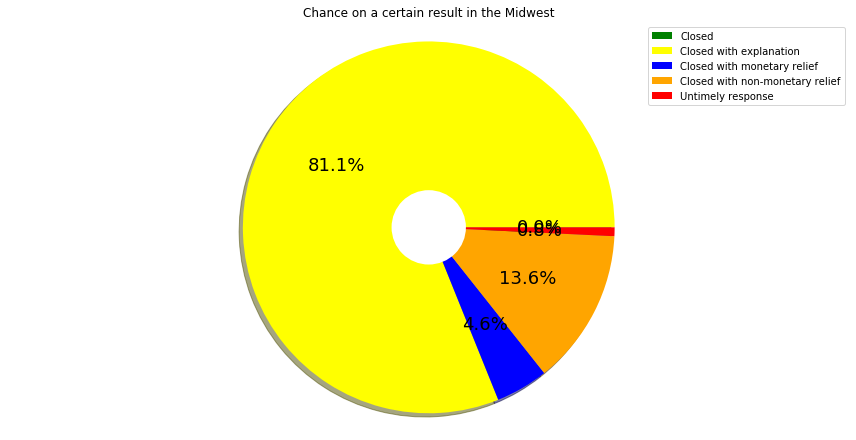

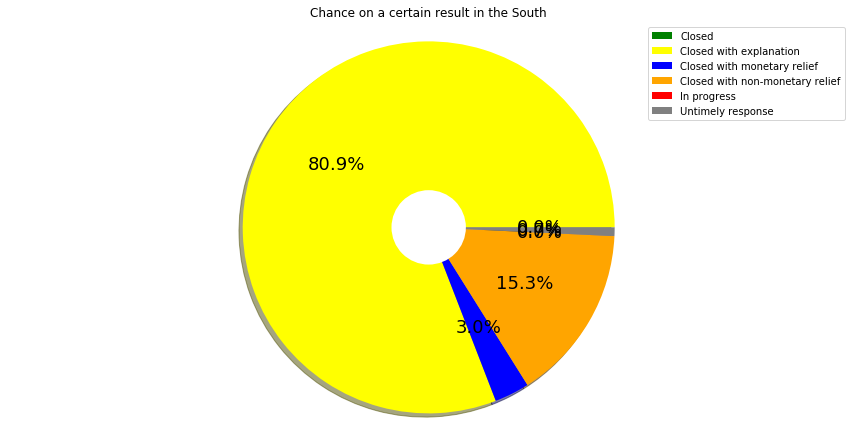

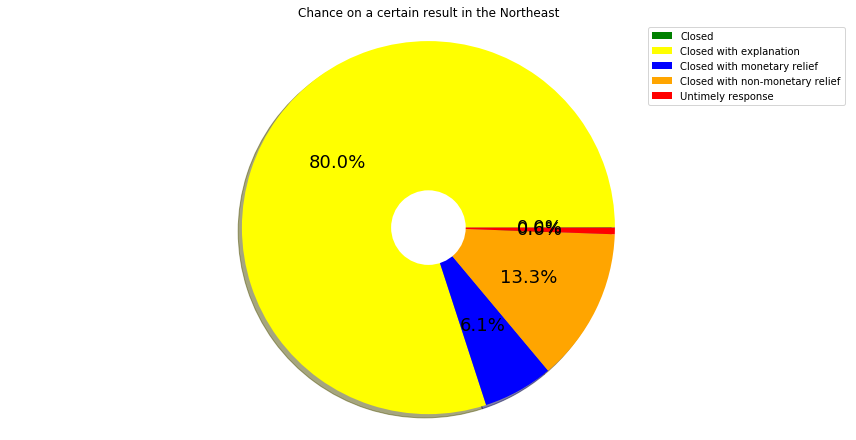

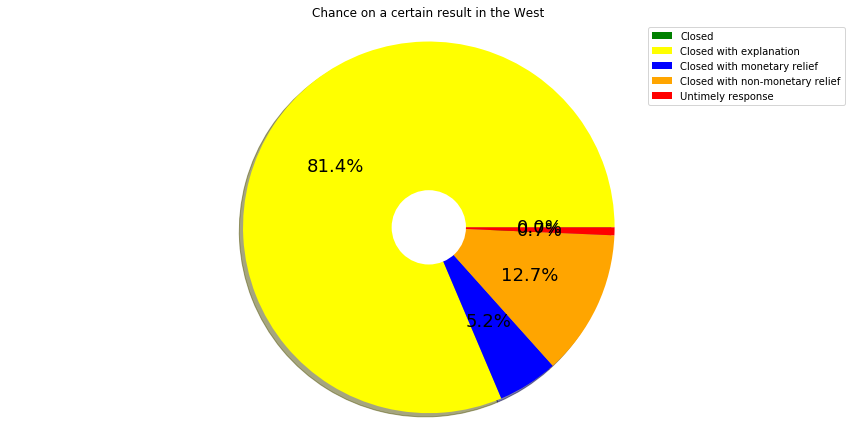

In [188]:

def plot(region):   
    onereg_df = region_df.loc[region_df['Region'] == region]
    sizes = onereg_df['Complaints'].tolist()
    labels = onereg_df['Response'].tolist()
    colors = ['green', 'yellow', 'blue', 'orange','red','grey','black']
    fig1, ax1 = plt.subplots(figsize=(12,6))   
    flavor_pie = ax1.pie(sizes, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 18})
    
    centre_circle = plt.Circle((0,0),0.20,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    ax1.set_title("Chance on a certain result in the " + region)
    plt.legend(labels)


    return plt
plot("Midwest").show()   
plot("South").show() 
plot("Northeast").show() 
plot("West").show() 

Hieruit kunnen we besluiten dat de reacties in de verschillende regio's verschillen. Tussen het noort oosten en het westen merken we bijna een verdubbeling op van het aantal complaints die positief zijn afgesloten door het verkijgen van een geldsom.

Deze resultaten verwerken we in een functie dia via de df_region dataframe de kans voor een bepaald resultaat geeft in een bepaalde regio voor een bepaalde response.

In [189]:
def give_chance(region,response):
    if region is None or response is None:
        return None
        
    region = str(region)
    row = pd.DataFrame(region_df.loc[region_df['Region'] == region])
    result = row.loc[row['Response'] == response]["Chance"]
    if result.values.size == 1:
        return result.values[0]
    else:
        return None
    

Deze functie wordt toepast op de complaints dataframe.

In [190]:
def apply_chance(x):
   return give_chance(x["Region"],x["Response"])
complaints_df['Chance'] = complaints_df.swifter.apply(apply_chance,axis=1)

Als volgt krijgen we dus voor elke complaint de kans dat dit antwoord wordt verkregen op basis van de locatie en het totale inwoners aantal.

In [191]:
complaints_df.head()

,Product,Narrative,Company,State,Response,Region,Chance
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,West,0.012076
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,South,0.014737
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,South,0.014737
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,South,0.014737
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,Northeast,0.011032


Nu gaan we nog de verschillende kansen normalizeren

In [192]:
import numpy
x= complaints_df['Chance'].unique()
x = x[~numpy.isnan(x)]
ratio = 1/sum(x)
def change_ratio(value):
    return ratio*value

complaints_df['Chance'] =complaints_df['Chance'].replace(np.nan, 0)

complaints_df['Chance'] = complaints_df['Chance'].swifter.apply(change_ratio)

In [193]:
complaints_df

,Product,Narrative,Company,State,Response,Region,Chance
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,West,0.209442
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,South,0.255602
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,South,0.255602
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,South,0.255602
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,Northeast,0.191339
...,...,...,...,...,...,...,...
49995,"Money transfer, virtual currency, or money ser...",Somebody sent me XXXX dollars by XXXX in bank ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",AR,Closed with explanation,South,0.255602
49996,"Money transfer, virtual currency, or money ser...",This issue that I am writing the CFPB about co...,HSBC NORTH AMERICA HOLDINGS INC.,UT,Closed with explanation,West,0.209442
49997,"Payday loan, title loan, or personal loan","Beginning on XX/XX/2019, I have received multi...","LDF Holdings, LLC",FL,Closed with explanation,South,0.255602
49998,"Credit reporting, credit repair services, or o...",I have an unauthorized hard inquiry from a com...,"EQUIFAX, INC.",MA,Closed with explanation,Northeast,0.191339


In [207]:
import numpy
x= complaints_df['Chance'].unique()
x = x[~numpy.isnan(x)]
sum(x)

0.9999999999999996

### SVM

In [215]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns 
from matplotlib import rcParams

%matplotlib inline
from sklearn.model_selection import train_test_split


train, test = train_test_split(complaints_source_df, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(list(complaints_df["Chance"]),list(complaints_df["Response"]), random_state=42)


In [216]:
from sklearn.decomposition import PCA

pca = PCA( whiten=False)
train_features = pca.fit_transform(np.asarray(X_train).reshape(-1, 1))
test_features = pca.transform(np.asarray(X_test).reshape(-1, 1))

print(train_features.shape)
print(test_features.shape)

(37500, 1)
(12500, 1)


In [221]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.LinearSVC()
classifier.fit(train_features, Y_train)
test_predictions = classifier.predict(test_features)
print(accuracy_score(test_predictions, Y_test))

0.94184


In [219]:
complaints_df['Response'].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Untimely response', 'Closed',
       'In progress'], dtype=object)

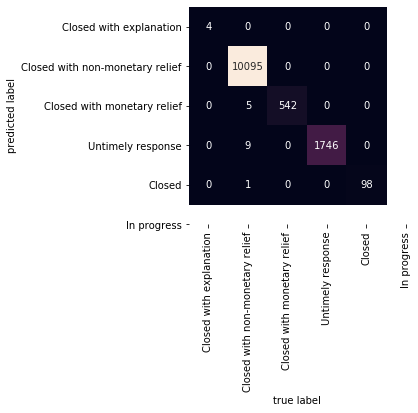

In [220]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_predictions, Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=complaints_df['Response'].unique(),
            yticklabels=complaints_df['Response'].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');